## *WARNING*
<ins>Before running this script make sure that you followed steps described [here](https://github.com/pwr-pbr23/M6#preparation-for-reproduction).</ins>
## Accessing files for reproduction
To access files we need to mount google drive and change working directory. To mount drive a pop up window will appear - follow necessary steps.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%cd /content/drive/MyDrive/M6/DeepLineDP/script

/content/drive/MyDrive/M6/DeepLineDP/script


In [3]:
!ls

DeepLineDP_model.py			line-level-baseline
export_data_for_line_level_baseline.py	my_util.py
file-level-baseline			preprocess_data.py
generate_prediction_cross_projects.py	__pycache__
generate_prediction.py			train_model.py
get_evaluation_result.R			train_word2vec.py


The previous line should've returned:

```
condacolab_install.log			my_util.py
DeepLineDP_model.py			new_preprocessing_methods.py
export_data_for_line_level_baseline.py	preprocess_data.py
file-level-baseline			__pycache__
generate_prediction_cross_projects.py	Rplots.pdf
generate_prediction.py			run_py_files.ipynb
get_evaluation_result.R			train_model.py
line-level-baseline			train_word2vec.py
```

## Installing necessary libraries - 2 min
Since we mounted google collab we do not need to repeat all the steps each time, since the result files are permanently saved, howerer when it comes to installing libaries this step <ins>needs to be run before each new session</ins>.

In [ ]:
# some warnings might occure
!pip install gensim==3.8.3
!pip install joblib==1.0.1
!pip install more-itertools==8.10.0
!pip install numpy==1.24.0
!pip install pyxdameraulevenshtein==1.5.3
!pip install pandas==1.3.3
!pip install pillow==8.3.2
!pip install python-dateutil==2.8.2
!pip install pytz==2021.3
!pip install scikit-learn==1.0
!pip install scipy==1.7.1
!pip install six==1.16.0
!pip install smart-open==5.2.1
!pip install threadpoolctl==3.0.0
!pip install tqdm==4.62.3
!pip install typing-extensions==3.10.0.2

## preprocess_data.py - 9 min
Data prepared for training models is saved in `/content/drive/MyDrive/M6/DeepLineDP/datasets/preprocessed_data`.

In [6]:
!python preprocess_data.py

  0% 0/9 [00:00<?, ?it/s]finish release activemq-5.0.0
finish release activemq-5.1.0
finish release activemq-5.2.0
finish release activemq-5.3.0
finish release activemq-5.8.0
 11% 1/9 [01:15<10:07, 75.93s/it]finish release camel-1.4.0
finish release camel-2.9.0
finish release camel-2.10.0
finish release camel-2.11.0
 22% 2/9 [03:17<11:59, 102.74s/it]finish release derby-10.2.1.6
finish release derby-10.3.1.4
finish release derby-10.5.1.1
 33% 3/9 [04:22<08:34, 85.73s/it] finish release groovy-1_5_7
finish release groovy-1_6_BETA_1
finish release groovy-1_6_BETA_2
 44% 4/9 [04:44<05:02, 60.53s/it]finish release hbase-0.94.0
finish release hbase-0.95.0
finish release hbase-0.95.2
 56% 5/9 [05:36<03:48, 57.17s/it]finish release hive-0.9.0
finish release hive-0.10.0
finish release hive-0.12.0
 67% 6/9 [06:21<02:39, 53.12s/it]finish release jruby-1.1
finish release jruby-1.4.0
finish release jruby-1.5.0
finish release jruby-1.7.0.preview1
 78% 7/9 [06:55<01:34, 47.06s/it]finish release luce

## train_word2vec.py - 3 min
It creates word2vec model, which is saved in `/content/drive/MyDrive/M6/DeepLineDP/output/Word2Vec_model`.

In [7]:
!python train_word2vec.py activemq
!python train_word2vec.py camel
!python train_word2vec.py derby
!python train_word2vec.py groovy
!python train_word2vec.py hbase
!python train_word2vec.py hive
!python train_word2vec.py jruby
!python train_word2vec.py lucene
!python train_word2vec.py wicket

save word2vec model at path ../output/Word2Vec_model//activemq-50dim.bin done
save word2vec model at path ../output/Word2Vec_model//camel-50dim.bin done
save word2vec model at path ../output/Word2Vec_model//derby-50dim.bin done
save word2vec model at path ../output/Word2Vec_model//groovy-50dim.bin done
save word2vec model at path ../output/Word2Vec_model//hbase-50dim.bin done
save word2vec model at path ../output/Word2Vec_model//hive-50dim.bin done
save word2vec model at path ../output/Word2Vec_model//jruby-50dim.bin done
save word2vec model at path ../output/Word2Vec_model//lucene-50dim.bin done
save word2vec model at path ../output/Word2Vec_model//wicket-50dim.bin done


## train_model.py - 51 min
Trains model and saves model along with loss (.csv).

| Output | saved location                                                 |
|--------|----------------------------------------------------------------|
| model  | `/content/drive/MyDrive/M6/DeepLineDP/output/model/DeepLineDP` |
| loss   | `/content/drive/MyDrive/M6/DeepLineDP/output/loss/DeepLineDP`  |


In [8]:
!python train_model.py -dataset activemq
!python train_model.py -dataset camel
!python train_model.py -dataset derby
!python train_model.py -dataset groovy
!python train_model.py -dataset hbase
!python train_model.py -dataset hive
!python train_model.py -dataset jruby
!python train_model.py -dataset lucene
!python train_model.py -dataset wicket

load Word2Vec for activemq finished
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
  0% 0/10 [00:00<?, ?it/s]activemq - at epoch: 1
 10% 1/10 [00:36<05:25, 36.21s/it]activemq - at epoch: 2
 20% 2/10 [01:10<04:40, 35.01s/it]activemq - at epoch: 3
 30% 3/10 [01:44<04:02, 34.57s/it]activemq - at epoch: 4
 40% 4/10 [02:20<03:30, 35.13s/it]activemq - at epoch: 5
 50% 5/10 [02:56<02:56, 35.40s/it]activemq - at epoch: 6
 60% 6/10 [03:31<02:20, 35.23s/it]activemq - at epoch: 7
 70% 7/10 [04:05<01:45, 35.09s/it]activemq - at epoch: 8
 80% 8/10 [04:41<01:10, 35.14s/it]activemq - at epoch: 9
 90% 9/10 [05:17<00:35, 35.42s/it]activemq - at epoch: 10
100% 10/10 [05:52<00:00, 35.25s/it]
load Word2Vec for camel finished
/usr/local/lib/python3.9/dist-

## generate_prediction.py - 14 min

| generated files | saved location                                             |
|-----------------|------------------------------------------------------------|
| output          | `/content/drive/MyDrive/M6/DeepLineDP/output/intermediate_output/DeepLineDP/within-release/` |
| prediction      | `/content/drive/MyDrive/M6/DeepLineDP/output/prediction/DeepLineDP/within-release/`          |


In [9]:
!python generate_prediction.py -dataset activemq
!python generate_prediction.py -dataset camel
!python generate_prediction.py -dataset derby
!python generate_prediction.py -dataset groovy
!python generate_prediction.py -dataset hbase
!python generate_prediction.py -dataset hive
!python generate_prediction.py -dataset jruby
!python generate_prediction.py -dataset lucene
!python generate_prediction.py -dataset wicket

load Word2Vec for activemq finished
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
generating prediction of release: activemq-5.2.0
100% 1286/1286 [00:25<00:00, 50.86it/s]
finished release activemq-5.2.0
generating prediction of release: activemq-5.3.0
100% 1487/1487 [00:28<00:00, 51.54it/s]
finished release activemq-5.3.0
generating prediction of release: activemq-5.8.0
100% 1927/1927 [00:38<00:00, 50.68it/s]
finished release activemq-5.8.0
load Word2Vec for camel finished
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout optio

## generate_prediction_cross_projects.py - 1h

| generated files | saved location                                             |
|-----------------|------------------------------------------------------------|
| output          | `/content/drive/MyDrive/M6/DeepLineDP/output/intermediate_output/DeepLineDP/cross-project/` |
| prediction      | `/content/drive/MyDrive/M6/DeepLineDP/output/prediction/DeepLineDP/cross-project/`          |


In [10]:
!python generate_prediction_cross_projects.py -dataset activemq
!python generate_prediction_cross_projects.py -dataset camel
!python generate_prediction_cross_projects.py -dataset derby
!python generate_prediction_cross_projects.py -dataset groovy
!python generate_prediction_cross_projects.py -dataset hbase
!python generate_prediction_cross_projects.py -dataset hive
!python generate_prediction_cross_projects.py -dataset jruby
!python generate_prediction_cross_projects.py -dataset lucene
!python generate_prediction_cross_projects.py -dataset wicket

load Word2Vec for activemq finished
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
using model from activemq-5.0.0 to generate prediction of camel-2.10.0
100% 2559/2559 [00:24<00:00, 105.89it/s]
finished release camel-2.10.0
using model from activemq-5.0.0 to generate prediction of camel-2.11.0
100% 2832/2832 [00:24<00:00, 114.39it/s]
finished release camel-2.11.0
using model from activemq-5.0.0 to generate prediction of derby-10.5.1.1
100% 1931/1931 [00:39<00:00, 49.13it/s]
finished release derby-10.5.1.1
using model from activemq-5.0.0 to generate prediction of groovy-1_6_BETA_2
100% 701/701 [00:09<00:00, 73.15it/s] 
finished release groovy-1_6_BETA_2
using model from activemq-5.0.0 to generate prediction of hbase-0.95.2
100% 1136/11

## Setup for running R script (creating graphs)
rpy2 is a library that makes it possible to run R scripts and code from jupyter notebook. To better understand the following setup and installation go to
[this site](https://rpy2.github.io/doc/latest/html/interactive.html).

In [ ]:
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

## Installing R packages - 25 min
Before this step reload might be required.

In [ ]:
# if restart was needed remember to change working directory
# %cd /content/drive/MyDrive/M6/DeepLineDP/script

In [ ]:
# some warning might occure during installation
%R install.packages("tidyverse", dependencies=TRUE)
%R install.packages("gridExtra", dependencies=TRUE)
%R install.packages("ModelMetrics", dependencies=TRUE)
%R install.packages("caret", dependencies=TRUE)
%R install.packages("reshape2", dependencies=TRUE)
%R install.packages("pROC", dependencies=TRUE)
%R install.packages("effsize", dependencies=TRUE)
%R install.packages("ScottKnottESD", dependencies=TRUE)

## get_evaluation_result.R - 3 min
The results from running this script are saved in `/content/drive/MyDrive/M6/DeepLineDP/output/figure/` (graphs as .pdf files).

In [4]:
!Rscript get_evaluation_result.R

System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to create bus connection: Host is down
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
In system("timedatectl", intern = TRUE) :
  running command 'timedatectl' had status 1

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘ModelMetrics’

The following object is masked from ‘package:base’:

    kappa

Loading required package: lattice

Attaching package: ‘caret’

The following objects are masked from ‘package:ModelMetrics’:

    confusionMatrix, precision, recall, sensitivity, specifici

/content/drive/MyDrive/M6/DeepLineDP/output/figure/rq1-1.png


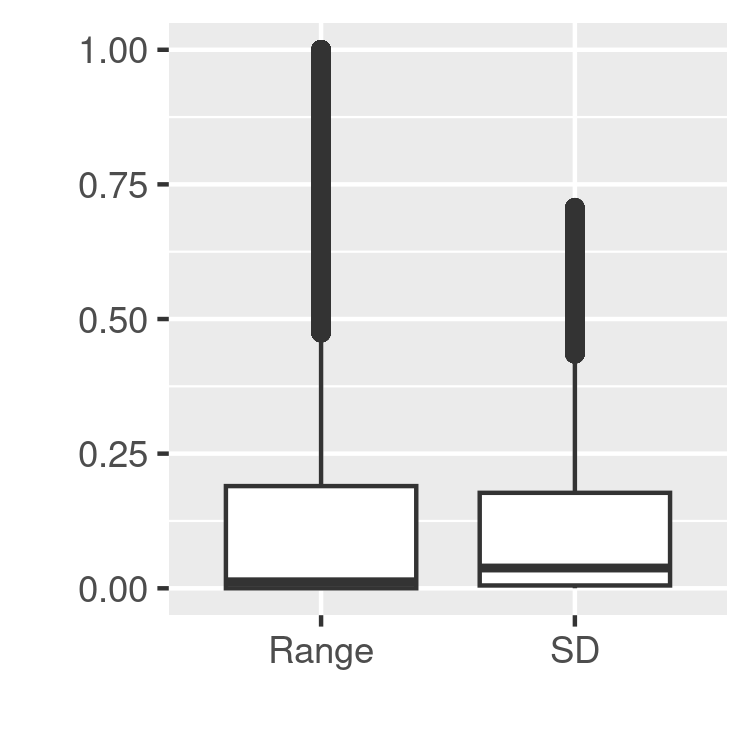

/content/drive/MyDrive/M6/DeepLineDP/output/figure/rq1-2.png


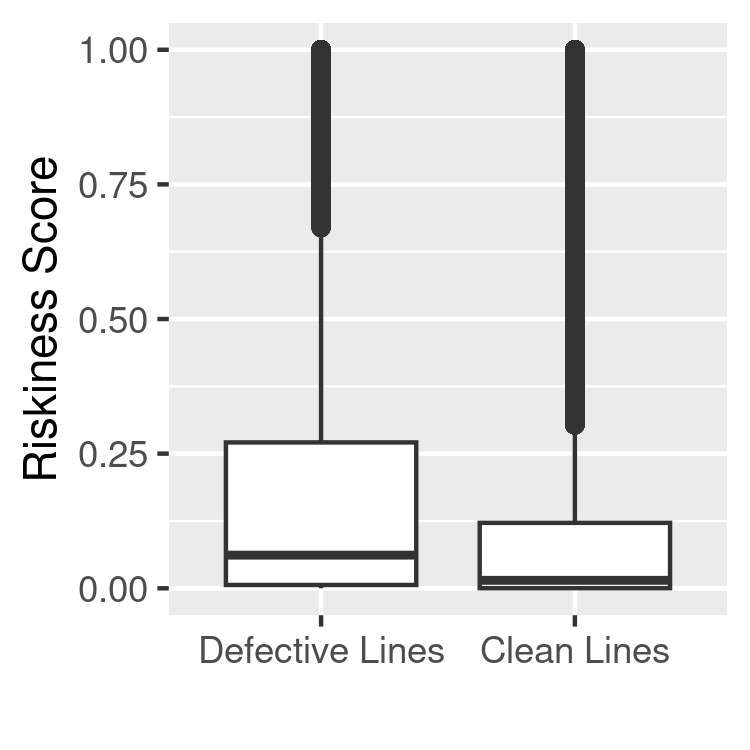

In [5]:
from IPython.display import Image, display

figures = '/content/drive/MyDrive/M6/DeepLineDP/output/figure'
listOfImageNames = [figures + '/rq1-1.png',
                    figures + '/rq1-2.png']

for imageName in listOfImageNames:
  print(imageName)
  display(Image(filename=imageName))